In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

from sklearn.preprocessing import LabelEncoder

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi4.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = minMaxScaling(data[scanners])

## Train Validation Test Split

In [6]:
train, validation, test = train_validation_test_split(data)

In [7]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_11,55,71,68,96,126,82,60,105,120,49,48,130,129,27,45,20,84
V1_12,67,76,43,84,79,76,56,58,153,51,74,151,126,79,106,56,71
V1_13,60,141,47,111,42,86,101,111,229,13,33,107,80,92,150,14,63
V1_14,36,154,45,82,56,89,261,66,210,14,105,50,78,83,164,63,86
V1_20,105,92,94,77,124,98,61,82,72,31,72,90,169,15,74,23,69
V1_21,64,132,78,72,90,90,120,52,132,17,86,93,78,64,85,70,62
V1_22,61,70,58,62,68,155,205,27,233,27,136,57,49,11,109,90,51
V1_23,57,86,53,47,35,202,123,46,290,31,194,58,79,9,107,116,61
V1_24,22,67,53,55,39,108,95,47,441,17,184,54,64,33,87,135,26


In [8]:
validation.shape

(6034, 19)

In [9]:
test.shape

(6035, 19)

In [10]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [11]:
train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [12]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_11,24304,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_11,24306,NaN,NaN,NaN,0.55,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_11,24307,NaN,NaN,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_11,24308,NaN,0.333333,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V1_11,24310,NaN,0.333333,NaN,0.55,0.516667,0.15,0.333333,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,V1_32,22547,0.183333,0.283333,0.333333,NaN,NaN,0.55,0.433333,NaN,0.516667,NaN,0.700000,0.25,NaN,NaN,0.258333,NaN,NaN
18098,V1_32,22549,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.500000,NaN,0.700000,0.25,0.3,NaN,0.258333,NaN,NaN
18099,V1_32,22551,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.505556,NaN,0.700000,NaN,0.3,NaN,0.258333,NaN,NaN
18100,V1_32,22552,0.183333,0.283333,0.333333,NaN,0.233333,NaN,0.433333,NaN,0.505556,NaN,0.679167,NaN,0.3,NaN,0.258333,NaN,NaN


## Imputation
1. Forward fill
2. Fill NaN

In [13]:
train_imputed = train.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [14]:
validation_imputed = validation.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [15]:
test_imputed = test.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Create Label Encoding for Each Fingerprint Location

In [16]:
X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

In [17]:
enc = LabelEncoder()

y_train = enc.fit_transform(y_train)
y_validation = enc.transform(y_validation)
y_test = enc.transform(y_test)

In [18]:
y_train.shape

(18102,)

## Model Training

In [19]:
model = MLPClassifier()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                462       
Total params: 3,694
Trainable params: 3,694
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 18102 samples, validate on 6034 samples
Epoch 1/2000
18102/18102 [==============================] - 1s 66us/sample - loss: 1.8213 - accuracy: 0.3941 - val_loss: 1.0980 - val_accuracy: 0.7547
Epoch 2/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.9974 - accuracy: 0.6687 - val_loss: 0.7134 - val_accuracy: 0.8384
Epoch 3/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.7399 - accuracy: 0.7756 - val_loss: 0.5837 - val_accuracy: 0.8580
Epoch 4/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.6211 - accuracy: 0.8234 - val_loss: 0.5182 - val_accuracy: 0.8752
Epoch 5/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.5510 - accuracy: 0.8524 - val_loss: 0.4917 - val_accuracy: 0.8823
Epoch 6/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.4980 - accuracy: 0.8705 - val_loss: 0.4695 - val_accuracy: 0.8888
Epoch 7/2000
18102/18102 [===================

18102/18102 [==============================] - 1s 33us/sample - loss: 0.1716 - accuracy: 0.9703 - val_loss: 0.3224 - val_accuracy: 0.9398
Epoch 55/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1726 - accuracy: 0.9694 - val_loss: 0.3027 - val_accuracy: 0.9491
Epoch 56/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1711 - accuracy: 0.9704 - val_loss: 0.3015 - val_accuracy: 0.9478
Epoch 57/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1715 - accuracy: 0.9675 - val_loss: 0.2974 - val_accuracy: 0.9456
Epoch 58/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1639 - accuracy: 0.9710 - val_loss: 0.3084 - val_accuracy: 0.9456
Epoch 59/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1667 - accuracy: 0.9693 - val_loss: 0.2931 - val_accuracy: 0.9485
Epoch 60/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1639 - accuracy:

Epoch 108/2000
18102/18102 [==============================] - 1s 33us/sample - loss: 0.1296 - accuracy: 0.9777 - val_loss: 0.2940 - val_accuracy: 0.9518
Epoch 109/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.1266 - accuracy: 0.9785 - val_loss: 0.2923 - val_accuracy: 0.9546
Epoch 110/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1283 - accuracy: 0.9775 - val_loss: 0.2910 - val_accuracy: 0.9514
Epoch 111/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.1244 - accuracy: 0.9798 - val_loss: 0.2838 - val_accuracy: 0.9513
Epoch 112/2000
18102/18102 [==============================] - 1s 34us/sample - loss: 0.1243 - accuracy: 0.9798 - val_loss: 0.2942 - val_accuracy: 0.9488
Epoch 113/2000
18102/18102 [==============================] - 1s 35us/sample - loss: 0.1238 - accuracy: 0.9782 - val_loss: 0.2990 - val_accuracy: 0.9448
Epoch 114/2000
18102/18102 [==============================] - 1s 34us/sample - los

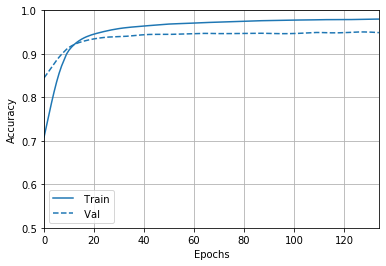

In [21]:
model.show_history()

## Model Validation

In [22]:
model.model_validation(X_validation, y_validation)

6034/1 - 0s - loss: 0.1839 - accuracy: 0.9438
Validation loss: 0.29162647530441455
Accuracy: 0.9438184


## Model Testing

In [23]:
model.model_testing(X_test, y_test)

6035/1 - 0s - loss: 0.1584 - accuracy: 0.9519
Test loss: 0.26624822909970763
Accuracy 0.951947


## Plotting Learning Curves

In [24]:
train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
    X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

    enc = LabelEncoder()
    y_train = enc.fit_transform(y_train)
    y_validation = enc.transform(y_validation)
    y_test = enc.transform(y_test)

    model = MLPClassifier(size='small')
    history = model.fit(X_train, y_train, X_validation, y_validation)

    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1152      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 14)                910       
Total params: 2,062
Trainable params: 2,062
Non-trainable params: 0
_________________________________________________________________
Train on 1810 samples, validate on 603 samples
Epoch 1/2000
1810/1810 [==============================] - 0s 204us/sample - loss: 2.5812 - accuracy: 0.1503 - val_loss: 2.5288 - val_accuracy: 0.2023
Epoch 2/2000
1810/1810 [==============================] - 0s 32us/sample - loss: 2.4262 - accuracy: 0.2652 - val_loss: 2.4050 - val_accuracy: 0.2471
Epoch 3/2000
1810/1810 [============

1810/1810 [==============================] - 0s 32us/sample - loss: 0.4250 - accuracy: 0.9133 - val_loss: 1.4448 - val_accuracy: 0.5423
Epoch 51/2000
1810/1810 [==============================] - 0s 32us/sample - loss: 0.4036 - accuracy: 0.9199 - val_loss: 1.4550 - val_accuracy: 0.5406
Epoch 52/2000
1810/1810 [==============================] - 0s 32us/sample - loss: 0.4125 - accuracy: 0.9088 - val_loss: 1.4694 - val_accuracy: 0.5406
Epoch 53/2000
1810/1810 [==============================] - 0s 33us/sample - loss: 0.4090 - accuracy: 0.9149 - val_loss: 1.4720 - val_accuracy: 0.5489
Epoch 54/2000
1810/1810 [==============================] - 0s 32us/sample - loss: 0.3918 - accuracy: 0.9254 - val_loss: 1.4719 - val_accuracy: 0.5522
Epoch 55/2000
1810/1810 [==============================] - 0s 31us/sample - loss: 0.3991 - accuracy: 0.9138 - val_loss: 1.4923 - val_accuracy: 0.5456
Epoch 56/2000
1810/1810 [==============================] - 0s 32us/sample - loss: 0.3781 - accuracy: 0.9282 - val_

3620/3620 [==============================] - 0s 35us/sample - loss: 0.5107 - accuracy: 0.8829 - val_loss: 1.3494 - val_accuracy: 0.6645
Epoch 25/2000
3620/3620 [==============================] - 0s 36us/sample - loss: 0.4831 - accuracy: 0.8898 - val_loss: 1.3192 - val_accuracy: 0.6678
Epoch 26/2000
3620/3620 [==============================] - 0s 36us/sample - loss: 0.4768 - accuracy: 0.8925 - val_loss: 1.3383 - val_accuracy: 0.6620
Epoch 27/2000
3620/3620 [==============================] - 0s 35us/sample - loss: 0.4627 - accuracy: 0.8914 - val_loss: 1.3637 - val_accuracy: 0.6636
Epoch 28/2000
3620/3620 [==============================] - 0s 35us/sample - loss: 0.4523 - accuracy: 0.8964 - val_loss: 1.3698 - val_accuracy: 0.6703
Epoch 29/2000
3620/3620 [==============================] - 0s 35us/sample - loss: 0.4400 - accuracy: 0.9022 - val_loss: 1.3842 - val_accuracy: 0.6678
Epoch 30/2000
3620/3620 [==============================] - 0s 36us/sample - loss: 0.4293 - accuracy: 0.9039 - val_

5430/5430 [==============================] - 0s 39us/sample - loss: 0.9422 - accuracy: 0.7527 - val_loss: 1.0380 - val_accuracy: 0.7398
Epoch 9/2000
5430/5430 [==============================] - 0s 38us/sample - loss: 0.8668 - accuracy: 0.7663 - val_loss: 0.9921 - val_accuracy: 0.7464
Epoch 10/2000
5430/5430 [==============================] - 0s 40us/sample - loss: 0.8001 - accuracy: 0.7948 - val_loss: 0.9611 - val_accuracy: 0.7552
Epoch 11/2000
5430/5430 [==============================] - 0s 39us/sample - loss: 0.7512 - accuracy: 0.8074 - val_loss: 0.9427 - val_accuracy: 0.7497
Epoch 12/2000
5430/5430 [==============================] - 0s 37us/sample - loss: 0.7075 - accuracy: 0.8177 - val_loss: 0.9278 - val_accuracy: 0.7558
Epoch 13/2000
5430/5430 [==============================] - 0s 37us/sample - loss: 0.6689 - accuracy: 0.8300 - val_loss: 0.9097 - val_accuracy: 0.7597
Epoch 14/2000
5430/5430 [==============================] - 0s 39us/sample - loss: 0.6330 - accuracy: 0.8435 - val_l

Epoch 63/2000
5430/5430 [==============================] - 0s 38us/sample - loss: 0.2862 - accuracy: 0.9440 - val_loss: 0.9536 - val_accuracy: 0.7641
Epoch 64/2000
5430/5430 [==============================] - 0s 43us/sample - loss: 0.2768 - accuracy: 0.9420 - val_loss: 0.9666 - val_accuracy: 0.7669
Epoch 65/2000
5430/5430 [==============================] - 0s 39us/sample - loss: 0.2879 - accuracy: 0.9400 - val_loss: 0.9718 - val_accuracy: 0.7680
Epoch 66/2000
5430/5430 [==============================] - 0s 38us/sample - loss: 0.2798 - accuracy: 0.9413 - val_loss: 0.9699 - val_accuracy: 0.7663
Epoch 67/2000
5430/5430 [==============================] - 0s 36us/sample - loss: 0.2783 - accuracy: 0.9466 - val_loss: 0.9522 - val_accuracy: 0.7685
Epoch 68/2000
5430/5430 [==============================] - 0s 36us/sample - loss: 0.2744 - accuracy: 0.9427 - val_loss: 0.9713 - val_accuracy: 0.7657
Epoch 69/2000
5430/5430 [==============================] - 0s 38us/sample - loss: 0.2744 - accuracy:

7240/7240 [==============================] - 0s 32us/sample - loss: 0.3145 - accuracy: 0.9286 - val_loss: 0.7778 - val_accuracy: 0.8310
Epoch 42/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.3053 - accuracy: 0.9330 - val_loss: 0.7786 - val_accuracy: 0.8306
Epoch 43/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.2992 - accuracy: 0.9355 - val_loss: 0.7679 - val_accuracy: 0.8393
Epoch 44/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.2995 - accuracy: 0.9354 - val_loss: 0.7583 - val_accuracy: 0.8368
Epoch 45/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.3018 - accuracy: 0.9319 - val_loss: 0.7644 - val_accuracy: 0.8389
Epoch 46/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.2918 - accuracy: 0.9383 - val_loss: 0.7705 - val_accuracy: 0.8384
Epoch 47/2000
7240/7240 [==============================] - 0s 32us/sample - loss: 0.2895 - accuracy: 0.9370 - val_

9051/9051 [==============================] - 0s 32us/sample - loss: 0.4319 - accuracy: 0.9006 - val_loss: 0.7249 - val_accuracy: 0.8064
Epoch 16/2000
9051/9051 [==============================] - 0s 31us/sample - loss: 0.4124 - accuracy: 0.9068 - val_loss: 0.7391 - val_accuracy: 0.7955
Epoch 17/2000
9051/9051 [==============================] - 0s 32us/sample - loss: 0.4065 - accuracy: 0.9073 - val_loss: 0.7301 - val_accuracy: 0.7998
Epoch 18/2000
9051/9051 [==============================] - 0s 32us/sample - loss: 0.3957 - accuracy: 0.9124 - val_loss: 0.7302 - val_accuracy: 0.7971
Epoch 19/2000
9051/9051 [==============================] - 0s 32us/sample - loss: 0.3779 - accuracy: 0.9192 - val_loss: 0.7338 - val_accuracy: 0.7991
Epoch 20/2000
9051/9051 [==============================] - 0s 32us/sample - loss: 0.3823 - accuracy: 0.9113 - val_loss: 0.7188 - val_accuracy: 0.8011
Epoch 21/2000
9051/9051 [==============================] - 0s 31us/sample - loss: 0.3671 - accuracy: 0.9224 - val_

10861/10861 [==============================] - 0s 31us/sample - loss: 1.6208 - accuracy: 0.5086 - val_loss: 1.3593 - val_accuracy: 0.7393
Epoch 3/2000
10861/10861 [==============================] - 0s 31us/sample - loss: 1.2699 - accuracy: 0.6221 - val_loss: 1.0841 - val_accuracy: 0.7799
Epoch 4/2000
10861/10861 [==============================] - 0s 32us/sample - loss: 1.0424 - accuracy: 0.7016 - val_loss: 0.9027 - val_accuracy: 0.8219
Epoch 5/2000
10861/10861 [==============================] - 0s 31us/sample - loss: 0.8810 - accuracy: 0.7545 - val_loss: 0.7887 - val_accuracy: 0.8246
Epoch 6/2000
10861/10861 [==============================] - 0s 32us/sample - loss: 0.7752 - accuracy: 0.7945 - val_loss: 0.7147 - val_accuracy: 0.8246
Epoch 7/2000
10861/10861 [==============================] - 0s 31us/sample - loss: 0.6838 - accuracy: 0.8238 - val_loss: 0.6642 - val_accuracy: 0.8285
Epoch 8/2000
10861/10861 [==============================] - 0s 32us/sample - loss: 0.6292 - accuracy: 0.837

10861/10861 [==============================] - 0s 29us/sample - loss: 0.2344 - accuracy: 0.9488 - val_loss: 0.5900 - val_accuracy: 0.8633
Epoch 57/2000
10861/10861 [==============================] - 0s 29us/sample - loss: 0.2391 - accuracy: 0.9468 - val_loss: 0.6126 - val_accuracy: 0.8622
Epoch 58/2000
10861/10861 [==============================] - 0s 29us/sample - loss: 0.2373 - accuracy: 0.9465 - val_loss: 0.5715 - val_accuracy: 0.8630
Epoch 59/2000
10861/10861 [==============================] - 0s 32us/sample - loss: 0.2299 - accuracy: 0.9487 - val_loss: 0.5933 - val_accuracy: 0.8567
Epoch 60/2000
10861/10861 [==============================] - 0s 29us/sample - loss: 0.2295 - accuracy: 0.9517 - val_loss: 0.5621 - val_accuracy: 0.8627
Epoch 61/2000
10861/10861 [==============================] - 0s 29us/sample - loss: 0.2260 - accuracy: 0.9504 - val_loss: 0.5976 - val_accuracy: 0.8630
Epoch 62/2000
10861/10861 [==============================] - 0s 29us/sample - loss: 0.2309 - accuracy:

Epoch 36/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.2669 - accuracy: 0.9398 - val_loss: 0.6906 - val_accuracy: 0.8601
Epoch 37/2000
12672/12672 [==============================] - 0s 29us/sample - loss: 0.2653 - accuracy: 0.9412 - val_loss: 0.6545 - val_accuracy: 0.8670
Epoch 38/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.2616 - accuracy: 0.9406 - val_loss: 0.6689 - val_accuracy: 0.8653
Epoch 39/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.2548 - accuracy: 0.9428 - val_loss: 0.6611 - val_accuracy: 0.8686
Epoch 40/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.2500 - accuracy: 0.9445 - val_loss: 0.6240 - val_accuracy: 0.8731
Epoch 41/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.2524 - accuracy: 0.9455 - val_loss: 0.6475 - val_accuracy: 0.8717
Epoch 42/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.24

Epoch 90/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1752 - accuracy: 0.9601 - val_loss: 0.6552 - val_accuracy: 0.8603
Epoch 91/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1775 - accuracy: 0.9606 - val_loss: 0.6339 - val_accuracy: 0.8745
Epoch 92/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1748 - accuracy: 0.9611 - val_loss: 0.6851 - val_accuracy: 0.8646
Epoch 93/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1724 - accuracy: 0.9613 - val_loss: 0.6596 - val_accuracy: 0.8771
Epoch 94/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1735 - accuracy: 0.9620 - val_loss: 0.6849 - val_accuracy: 0.8535
Epoch 95/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.1725 - accuracy: 0.9610 - val_loss: 0.6430 - val_accuracy: 0.8700
Epoch 96/2000
12672/12672 [==============================] - 0s 30us/sample - loss: 0.16

14482/14482 [==============================] - 0s 31us/sample - loss: 0.3736 - accuracy: 0.9120 - val_loss: 0.6634 - val_accuracy: 0.8281
Epoch 16/2000
14482/14482 [==============================] - 0s 31us/sample - loss: 0.3624 - accuracy: 0.9153 - val_loss: 0.6708 - val_accuracy: 0.8254
Epoch 17/2000
14482/14482 [==============================] - 0s 31us/sample - loss: 0.3506 - accuracy: 0.9163 - val_loss: 0.6762 - val_accuracy: 0.8231
Epoch 18/2000
14482/14482 [==============================] - 0s 32us/sample - loss: 0.3358 - accuracy: 0.9242 - val_loss: 0.6870 - val_accuracy: 0.8243
Epoch 19/2000
14482/14482 [==============================] - 0s 31us/sample - loss: 0.3364 - accuracy: 0.9211 - val_loss: 0.6669 - val_accuracy: 0.8291
Epoch 20/2000
14482/14482 [==============================] - 0s 31us/sample - loss: 0.3254 - accuracy: 0.9264 - val_loss: 0.6669 - val_accuracy: 0.8328
Epoch 21/2000
14482/14482 [==============================] - 0s 31us/sample - loss: 0.3187 - accuracy:

Epoch 2/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 1.3639 - accuracy: 0.6150 - val_loss: 1.0477 - val_accuracy: 0.8549
Epoch 3/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 1.0034 - accuracy: 0.7165 - val_loss: 0.7965 - val_accuracy: 0.8682
Epoch 4/2000
16292/16292 [==============================] - 0s 31us/sample - loss: 0.8081 - accuracy: 0.7788 - val_loss: 0.6501 - val_accuracy: 0.8938
Epoch 5/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 0.6869 - accuracy: 0.8167 - val_loss: 0.5735 - val_accuracy: 0.8939
Epoch 6/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 0.6046 - accuracy: 0.8408 - val_loss: 0.5173 - val_accuracy: 0.9068
Epoch 7/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 0.5502 - accuracy: 0.8584 - val_loss: 0.4929 - val_accuracy: 0.9083
Epoch 8/2000
16292/16292 [==============================] - 1s 31us/sample - loss: 0.5110 - ac

Epoch 56/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.2214 - accuracy: 0.9462 - val_loss: 0.3298 - val_accuracy: 0.9381
Epoch 57/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.2189 - accuracy: 0.9457 - val_loss: 0.3161 - val_accuracy: 0.9446
Epoch 58/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.2166 - accuracy: 0.9465 - val_loss: 0.3117 - val_accuracy: 0.9475
Epoch 59/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.2151 - accuracy: 0.9479 - val_loss: 0.3153 - val_accuracy: 0.9427
Epoch 60/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.2116 - accuracy: 0.9495 - val_loss: 0.3124 - val_accuracy: 0.9418
Epoch 61/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.2172 - accuracy: 0.9465 - val_loss: 0.3070 - val_accuracy: 0.9431
Epoch 62/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.21

Epoch 110/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1703 - accuracy: 0.9588 - val_loss: 0.2961 - val_accuracy: 0.9427
Epoch 111/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1717 - accuracy: 0.9565 - val_loss: 0.2911 - val_accuracy: 0.9431
Epoch 112/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1693 - accuracy: 0.9570 - val_loss: 0.3087 - val_accuracy: 0.9426
Epoch 113/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1708 - accuracy: 0.9589 - val_loss: 0.3053 - val_accuracy: 0.9427
Epoch 114/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1666 - accuracy: 0.9587 - val_loss: 0.3049 - val_accuracy: 0.9426
Epoch 115/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1672 - accuracy: 0.9593 - val_loss: 0.2928 - val_accuracy: 0.9481
Epoch 116/2000
16292/16292 [==============================] - 0s 28us/sample - los

16292/16292 [==============================] - 0s 29us/sample - loss: 0.1510 - accuracy: 0.9609 - val_loss: 0.2846 - val_accuracy: 0.9484
Epoch 164/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1504 - accuracy: 0.9604 - val_loss: 0.2968 - val_accuracy: 0.9398
Epoch 165/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1487 - accuracy: 0.9617 - val_loss: 0.2867 - val_accuracy: 0.9457
Epoch 166/2000
16292/16292 [==============================] - 0s 30us/sample - loss: 0.1506 - accuracy: 0.9594 - val_loss: 0.2826 - val_accuracy: 0.9490
Epoch 167/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1498 - accuracy: 0.9611 - val_loss: 0.2860 - val_accuracy: 0.9431
Epoch 168/2000
16292/16292 [==============================] - 0s 30us/sample - loss: 0.1434 - accuracy: 0.9639 - val_loss: 0.2983 - val_accuracy: 0.9464
Epoch 169/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1468 - acc

16292/16292 [==============================] - 0s 28us/sample - loss: 0.1346 - accuracy: 0.9651 - val_loss: 0.3070 - val_accuracy: 0.9370
Epoch 217/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1348 - accuracy: 0.9647 - val_loss: 0.3013 - val_accuracy: 0.9400
Epoch 218/2000
16292/16292 [==============================] - 0s 28us/sample - loss: 0.1402 - accuracy: 0.9619 - val_loss: 0.2955 - val_accuracy: 0.9414
Epoch 219/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1335 - accuracy: 0.9662 - val_loss: 0.3026 - val_accuracy: 0.9343
Epoch 220/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1361 - accuracy: 0.9643 - val_loss: 0.2985 - val_accuracy: 0.9392
Epoch 221/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1339 - accuracy: 0.9655 - val_loss: 0.2937 - val_accuracy: 0.9429
Epoch 222/2000
16292/16292 [==============================] - 0s 29us/sample - loss: 0.1344 - acc

18102/18102 [==============================] - 1s 28us/sample - loss: 0.3325 - accuracy: 0.9212 - val_loss: 0.4271 - val_accuracy: 0.9277
Epoch 18/2000
18102/18102 [==============================] - 1s 28us/sample - loss: 0.3249 - accuracy: 0.9257 - val_loss: 0.4299 - val_accuracy: 0.9251
Epoch 19/2000
18102/18102 [==============================] - 1s 28us/sample - loss: 0.3153 - accuracy: 0.9260 - val_loss: 0.4331 - val_accuracy: 0.9214
Epoch 20/2000
18102/18102 [==============================] - 1s 28us/sample - loss: 0.3127 - accuracy: 0.9256 - val_loss: 0.4290 - val_accuracy: 0.9244
Epoch 21/2000
18102/18102 [==============================] - 1s 28us/sample - loss: 0.3040 - accuracy: 0.9284 - val_loss: 0.4321 - val_accuracy: 0.9253
Epoch 22/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3020 - accuracy: 0.9302 - val_loss: 0.4288 - val_accuracy: 0.9261
Epoch 23/2000
18102/18102 [==============================] - 1s 28us/sample - loss: 0.2939 - accuracy:

Epoch 71/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1885 - accuracy: 0.9531 - val_loss: 0.3711 - val_accuracy: 0.9291
Epoch 72/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1852 - accuracy: 0.9559 - val_loss: 0.3646 - val_accuracy: 0.9312
Epoch 73/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1877 - accuracy: 0.9552 - val_loss: 0.3627 - val_accuracy: 0.9335
Epoch 74/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1842 - accuracy: 0.9572 - val_loss: 0.3747 - val_accuracy: 0.9296
Epoch 75/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1857 - accuracy: 0.9550 - val_loss: 0.3909 - val_accuracy: 0.9248
Epoch 76/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1822 - accuracy: 0.9583 - val_loss: 0.3723 - val_accuracy: 0.9321
Epoch 77/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.18

Epoch 125/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1524 - accuracy: 0.9606 - val_loss: 0.3707 - val_accuracy: 0.9272
Epoch 126/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1499 - accuracy: 0.9624 - val_loss: 0.3658 - val_accuracy: 0.9281
Epoch 127/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1540 - accuracy: 0.9614 - val_loss: 0.3442 - val_accuracy: 0.9332
Epoch 128/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1530 - accuracy: 0.9601 - val_loss: 0.3541 - val_accuracy: 0.9307
Epoch 129/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1547 - accuracy: 0.9604 - val_loss: 0.3519 - val_accuracy: 0.9350
Epoch 130/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.1504 - accuracy: 0.9623 - val_loss: 0.3546 - val_accuracy: 0.9286
Epoch 131/2000
18102/18102 [==============================] - 1s 31us/sample - los

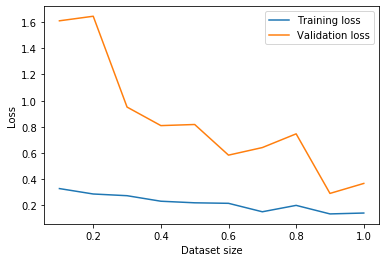

In [25]:
x = np.arange(0.1, 1.1, 0.1)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()

In [26]:
model.save('../Models/MLP_Classification_Rolling_FFill_MinMax.h5')